In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np



In [14]:
# get the function to process the gfile.
import getGfileDict

import os
cwd = os.getcwd()
parentdir = cwd + '/eqdsk_WHAM1_modelb2_B0.427T'
print('Get current working directory : ', os.getcwd())
print(parentdir)
gfileDict = getGfileDict.getGfileDict(parentdir)

#below are the variables required to work with the magnetic field
rgrid = gfileDict["rgrid"]
print(rgrid.shape)
zgrid = gfileDict["zgrid"]
magAxisR = gfileDict['rmaxis'] 
magAxisZ = gfileDict['zmaxis'] 
B_zGrid = gfileDict["bzrz"]
B_TGrid = gfileDict["btrz"]
B_rGrid = gfileDict["brrz"]


Get current working directory :  /home/vandelij/Desktop/HFS_HHFW_antenna/GENRAY_CQL_Scripts
/home/vandelij/Desktop/HFS_HHFW_antenna/GENRAY_CQL_Scripts/eqdsk_WHAM1_modelb2_B0.427T
I was called
(530,)


In [16]:
r = gfileDict["rgrid"]
z = gfileDict["zgrid"]
psi = gfileDict['psirz']
print(r)

[1.00000000e-04 8.08884688e-04 1.51776938e-03 2.22665406e-03
 2.93553875e-03 3.64442344e-03 4.35330813e-03 5.06219282e-03
 5.77107750e-03 6.47996219e-03 7.18884688e-03 7.89773157e-03
 8.60661626e-03 9.31550095e-03 1.00243856e-02 1.07332703e-02
 1.14421550e-02 1.21510397e-02 1.28599244e-02 1.35688091e-02
 1.42776938e-02 1.49865784e-02 1.56954631e-02 1.64043478e-02
 1.71132325e-02 1.78221172e-02 1.85310019e-02 1.92398866e-02
 1.99487713e-02 2.06576560e-02 2.13665406e-02 2.20754253e-02
 2.27843100e-02 2.34931947e-02 2.42020794e-02 2.49109641e-02
 2.56198488e-02 2.63287335e-02 2.70376181e-02 2.77465028e-02
 2.84553875e-02 2.91642722e-02 2.98731569e-02 3.05820416e-02
 3.12909263e-02 3.19998110e-02 3.27086957e-02 3.34175803e-02
 3.41264650e-02 3.48353497e-02 3.55442344e-02 3.62531191e-02
 3.69620038e-02 3.76708885e-02 3.83797732e-02 3.90886578e-02
 3.97975425e-02 4.05064272e-02 4.12153119e-02 4.19241966e-02
 4.26330813e-02 4.33419660e-02 4.40508507e-02 4.47597353e-02
 4.54686200e-02 4.617750

In [17]:
print(gfileDict.keys())

dict_keys(['header', 'idum', 'mw', 'mh', 'xdim', 'zdim', 'rzero', 'rgrid1', 'zmid', 'rmaxis', 'zmaxis', 'ssimag', 'ssibdry', 'bcentr', 'cpasma', 'ssibry', 'rgrid', 'zgrid', 'psirz', 'psirzraw', 'fpol', 'pres', 'ffprim', 'pprime', 'qpsi', 'nbbbs', 'rbbbs', 'zbbbs', 'nlim', 'xlim', 'ylim', 'isPlasma', 'pressrz', 'qrz', 'btrz', 'brrz', 'bzrz', 'jtrz', 'npsimid', 'gammamid', 'bzmid', 'btmid', 'jtmid', 'pressmid', 'qmid'])


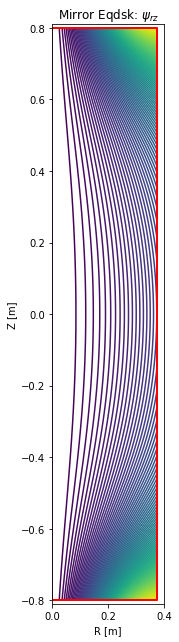

In [18]:
base = 2
fig, ax = plt.subplots(figsize = (base,base*5.33))
ax.contour(r, z, psi, levels=100)
ax.set_xlim(0, 0.4)
ax.set_ylim(-0.81, .81)
ax.set_xlabel('R [m]')
ax.set_ylabel('Z [m]')
ax.set_title(r'Mirror Eqdsk: $\psi_{rz}$')
ax.plot(gfileDict['xlim'], gfileDict['ylim'], color='red')

In [26]:
from scipy.interpolate import interp2d
def drawFluxSurfaces(ax, levels):
    r = gfileDict["rgrid"]
    z = gfileDict["zgrid"]
    psirz = gfileDict["psirz"]
    
    psi_mag_axis = gfileDict["ssimag"]
    psi_boundary = gfileDict["ssibdry"]
    
    ## THIS NEEDS TO BE TOROIDAL RHO
    # normalize the psirz so that the norm is 1 on boundary and zero on axis 
    psirzNorm = (psirz - psi_mag_axis)/(psi_boundary-psi_mag_axis)  

    # create 2D interpolation to create a contour plot from 
    rInterp = np.linspace(np.min(r), np.max(r), 200)
    zInterp = np.linspace(np.min(z), np.max(z), 200)
    psirzNormInterp = interp2d(r,z, psirzNorm, kind = 'cubic')(rInterp, zInterp)
    
    rhosToPlot = np.arange(.1,1.1,.1)

    ax.contour(rInterp, zInterp, psirzNormInterp, np.square(rhosToPlot), colors= 'k', levels=levels)

Get current working directory :  /home/vandelij/Desktop/HFS_HHFW_antenna/GENRAY_CQL_Scripts
/home/vandelij/Desktop/HFS_HHFW_antenna/GENRAY_CQL_Scripts/g200201.00000
I was called
(129,)


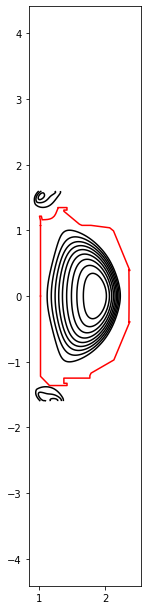

In [29]:
cwd = os.getcwd()
parentdir = cwd + '/g200201.00000'
print('Get current working directory : ', os.getcwd())
print(parentdir)
gfileDict = getGfileDict.getGfileDict(parentdir)
rhosToPlot = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
#below are the variables required to work with the magnetic field
rgrid = gfileDict["rgrid"]
print(rgrid.shape)
zgrid = gfileDict["zgrid"]
magAxisR = gfileDict['rmaxis'] 
magAxisZ = gfileDict['zmaxis'] 
B_zGrid = gfileDict["bzrz"]
B_TGrid = gfileDict["btrz"]
B_rGrid = gfileDict["brrz"]
r = gfileDict["rgrid"]
z = gfileDict["zgrid"]
psi = gfileDict['psirz']
base = 2
fig, ax = plt.subplots(figsize = (base,base*5.33))
drawFluxSurfaces(ax, levels=rhosToPlot)
# ax.contour(r, z, psi, levels=rhosToPlot)
plt.axis('equal')
# #ax.set_xlim(0, 0.4)
# # ax.set_ylim(-0.81, .81)
# ax.set_xlabel('R [m]')
# ax.set_ylabel('Z [m]')
# ax.set_title(r'Mirror Eqdsk: $\psi_{rz}$')
ax.plot(gfileDict['xlim'], gfileDict['ylim'], color='red')